In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
ID,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
df_num=df.select_dtypes(['int64','float64'])

In [10]:
df_cat=df.select_dtypes(['object'])

In [11]:
from scipy.stats import skew

In [12]:
# Skew = 3 * (Mean – Median) / Standard Deviation.
for i in df_num:
    print(i,skew(df_num[i]))

#data skewness > -1 and < 1 that means data is normally distributed 

carat 1.1166148681277797
depth -0.08229173779627727
table 0.7968736878796518
price 1.6183502776053016
x 0.3786658120772097
y 2.4340990250113648
z 1.5223802221853722


In [13]:
from sklearn.preprocessing import LabelEncoder 

In [14]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [15]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cut      53940 non-null  int32
 1   color    53940 non-null  int32
 2   clarity  53940 non-null  int32
dtypes: int32(3)
memory usage: 1.0 MB


In [16]:
df_cat

,cut,color,clarity
ID,,,
1,2,1,3
2,3,1,2
3,1,1,4
4,3,5,5
5,1,6,3
...,...,...,...
53936,2,0,2
53937,1,0,2
53938,4,0,2


In [17]:
df_new=pd.merge(df_num,df_cat,on="ID")

In [18]:
df_new

,carat,depth,table,price,x,y,z,cut,color,clarity
ID,,,,,,,,,,
1,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
2,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
4,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,4,0,2


In [19]:
x=df_new.drop("price",axis=1)
y=df_new["price"]

In [20]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [21]:
x

array([[-1.19816781, -0.17409151, -1.09967199, ..., -0.53809897,
        -0.93716275, -0.4842643 ],
       [-1.24036129, -1.36073849,  1.58552871, ...,  0.43494935,
        -0.93716275, -1.06411727],
       [-1.19816781, -3.38501862,  3.37566251, ..., -1.51114729,
        -0.93716275,  0.09558866],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, ...,  1.40799767,
        -1.52502147, -1.06411727],
       [ 0.13092691, -0.52310533,  0.24292836, ...,  0.43494935,
         0.8264134 , -0.4842643 ],
       [-0.10113725,  0.31452784, -1.09967199, ..., -0.53809897,
        -1.52502147, -0.4842643 ]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [23]:
x.shape[1]

9

In [101]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(2, activation="relu", input_shape=(x.shape[1], )),
     tf.keras.layers.Dense(3, activation="relu"),
     tf.keras.layers.Dense(1)]
)

In [102]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 4         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(optimizer="sgd", loss="mse")

In [114]:
trained_model = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1180/1180 [==============================] - 1s 452us/step - loss: 15850627.0000
Epoch 2/50
1180/1180 [==============================] - 1s 469us/step - loss: 15847890.0000
Epoch 3/50
1180/1180 [==============================] - 1s 512us/step - loss: 15846070.0000
Epoch 4/50
1180/1180 [==============================] - 1s 491us/step - loss: 15848479.0000
Epoch 5/50
1180/1180 [==============================] - 1s 493us/step - loss: 15847460.0000
Epoch 6/50
1180/1180 [==============================] - 1s 464us/step - loss: 15849355.0000
Epoch 7/50
1180/1180 [==============================] - 1s 504us/step - loss: 15849487.0000
Epoch 8/50
1180/1180 [==============================] - 1s 510us/step - loss: 15850355.0000
Epoch 9/50
1180/1180 [==============================] - 1s 535us/step - loss: 15850818.0000
Epoch 10/50
1180/1180 [==============================] - 1s 569us/step - loss: 15847552.0000
Epoch 11/50
1180/1180 [==============================] - 1s 513us/step - loss: 

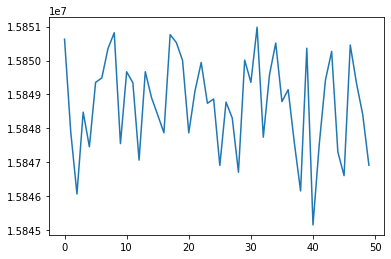

In [115]:
plt.plot(trained_model.history['loss'])
plt.show()

In [116]:
y_hat = model.predict(x_test)

In [117]:
from sklearn.metrics import r2_score

In [118]:
r2_score(y_test, y_hat)

-0.0004695655692654732